In [97]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer,WordNetLemmatizer
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
messages = pd.read_csv("spam.csv", encoding='latin-1')

In [99]:
messages.shape
messages.drop(labels = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='v1', ylabel='count'>

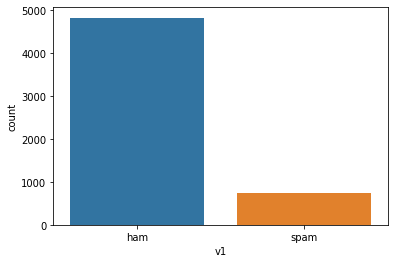

In [100]:
encoder = LabelEncoder()
messages['target'] = encoder.fit_transform (messages['v1'])
sns.countplot(x=messages.v1)

In [101]:
# Creating a function to report confusion metrics

def confusion_metrics (conf_matrix,y_test,y_pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    print("Classification accuracy = ", accuracy_score(y_test,y_pred)*100)
    print("Precision               = ", precision_score(y_test,y_pred)*100)
    print("Recall                  = ", recall_score(y_test,y_pred)*100)
    print("F1-score                = ", f1_score(y_test,y_pred)*100)
    print("Neagtive recall         = ", (conf_matrix[0][0] / float(conf_matrix[0][0] + conf_matrix[0][1]))*100)
    
    

In [102]:
ps = PorterStemmer()
ss = SnowballStemmer(language='english')
ls = LancasterStemmer()
lem = WordNetLemmatizer()
n = len(messages)
corpus1 = []
corpus2 = []
corpus3 = []
corpus4 = []

for i in range(0,n):
    data_clean = re.sub('[^a-zA-Z]', ' ', messages['v2'][i])
    data_clean = data_clean.lower()
    data_clean = data_clean.split()
    
    data_stem_ps = [ps.stem(word) for word in data_clean if not word in stopwords.words('english')]
    data_stem_ss = [ss.stem(word) for word in data_clean if not word in stopwords.words('english')]
    data_stem_ls = [ls.stem(word) for word in data_clean if not word in stopwords.words('english')]
    
    data_lem = [lem.lemmatize(word) for word in data_clean if not word in stopwords.words('english')]
    data_lem = ' '.join(data_lem)
    
    data_lem_ps = [lem.lemmatize(word) for word in data_stem_ps if not word in stopwords.words('english')]
    data_lem_ps = ' '.join(data_lem_ps)
    data_lem_ss = [lem.lemmatize(word) for word in data_stem_ss if not word in stopwords.words('english')]
    data_lem_ss = ' '.join(data_lem_ss)
    
    data_lem_ls = [lem.lemmatize(word) for word in data_stem_ls if not word in stopwords.words('english')]
    data_lem_ls = ' '.join(data_lem_ls)
    
    corpus1.append(data_lem_ps)
    corpus2.append(data_lem_ss)
    corpus3.append(data_lem_ls)
    corpus4.append(data_lem)

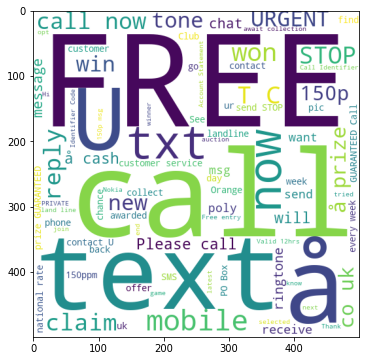

In [103]:
wc = WordCloud (width = 500, height = 500, min_font_size=10, background_color= 'white')
spam_wc = wc.generate (messages [messages['v1'] == 'spam']['v2'].str.cat(sep=" "))
plt.figure (figsize = (20,6))
plt.imshow (spam_wc)

In [104]:
corpus1

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [105]:
# Creating the TF-IDF model
def tfidf_model(corpus1,corpus2,corpus3,corpus4):
    cv = TfidfVectorizer()
    X1 = cv.fit_transform(corpus1).toarray()
    X2 = cv.fit_transform(corpus2).toarray()
    X3 = cv.fit_transform(corpus3).toarray()
    X4 = cv.fit_transform(corpus4).toarray()
    Y = pd.get_dummies(messages['v1'])
    Y=Y.iloc[:,1].values
    return X1,X2,X3,X4,Y

In [106]:
# Creating the Bag of Words model
def bag_of_words_model(corpus1,corpus2,corpus3,corpus4):
        cv = CountVectorizer()
        X1 = cv.fit_transform(corpus1).toarray()
        X2 = cv.fit_transform(corpus2).toarray()
        X3 = cv.fit_transform(corpus3).toarray()
        X4 = cv.fit_transform(corpus4).toarray()
        Y = pd.get_dummies(messages['v1'])
        Y=Y.iloc[:,1].values
        return X1,X2,X3,X4,Y

In [107]:
# Train Test Split for TF-IDF

from sklearn.model_selection import train_test_split
X1tf = tfidf_model(corpus1,corpus2,corpus3,corpus4)[0]
X2tf = tfidf_model(corpus1,corpus2,corpus3,corpus4)[1]
X3tf = tfidf_model(corpus1,corpus2,corpus3,corpus4)[2]
X4tf = tfidf_model(corpus1,corpus2,corpus3,corpus4)[3]
Ytf  = tfidf_model(corpus1,corpus2,corpus3,corpus4)[4]
X1tf_train, X1tf_test, Y1tf_train, Y1tf_test = train_test_split(X1tf, Ytf, test_size = 0.30, random_state = 0)
X2tf_train, X2tf_test, Y2tf_train, Y2tf_test = train_test_split(X2tf, Ytf, test_size = 0.30, random_state = 0)
X3tf_train, X3tf_test, Y3tf_train, Y3tf_test = train_test_split(X3tf, Ytf, test_size = 0.30, random_state = 0)
X4tf_train, X4tf_test, Y4tf_train, Y4tf_test = train_test_split(X4tf, Ytf, test_size = 0.30, random_state = 0)

In [108]:
X1tf[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
# Train Test Split for Bag-of-words

from sklearn.model_selection import train_test_split
X1bow = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[0]
X2bow = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[1]
X3bow = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[2]
X4bow = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[3]
Ybow  = bag_of_words_model(corpus1,corpus2,corpus3,corpus4)[4]
X1bow_train, X1bow_test, Y1bow_train, Y1bow_test = train_test_split(X1bow, Ybow, test_size = 0.30, random_state = 0)
X2bow_train, X2bow_test, Y2bow_train, Y2bow_test = train_test_split(X2bow, Ybow, test_size = 0.30, random_state = 0)
X3bow_train, X3bow_test, Y3bow_train, Y3bow_test = train_test_split(X3bow, Ybow, test_size = 0.30, random_state = 0)
X4bow_train, X4bow_test, Y4bow_train, Y4bow_test = train_test_split(X4bow, Ybow, test_size = 0.30, random_state = 0)

In [110]:
X1bow.shape

(5572, 6172)

In [111]:
X_live_train, X_live_test, y_live_train, y_live_test = train_test_split(messages.v2, messages.v1, test_size=0.2)

In [112]:
v = CountVectorizer()

X_train_cv = v.fit_transform(X_live_train.values)
X_train_cv.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
# Multinomial Naive Bayes

def MNB_model(x_train, x_test, y_train, y_test):
    MNB = MultinomialNB()
    MNB.fit(x_train, y_train)
    y_pred = MNB.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def MNB2_model(x_train, x_test, y_train, y_test):
    MNB = MultinomialNB()
    MNB.fit(x_train, y_train)
    y_pred = MNB.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)


In [114]:
# Bernoulli Naive Bayes

def BNB_model(x_train, x_test, y_train, y_test):
    BNB = BernoulliNB()
    BNB.fit(x_train, y_train)
    y_pred = BNB.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def BNB2_model(x_train, x_test, y_train, y_test):
    BNB = BernoulliNB()
    BNB.fit(x_train, y_train)
    y_pred = BNB.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [115]:
# Support Vector Machine

def SVM_model(x_train, x_test, y_train, y_test):
    SVM = LinearSVC()
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def SVM2_model(x_train, x_test, y_train, y_test):
    SVM = LinearSVC()
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [116]:
# Decision tree Classifier

def DT_model(x_train, x_test, y_train, y_test):
    DT = DecisionTreeClassifier()
    DT.fit(x_train, y_train)
    y_pred = DT.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def DT2_model(x_train, x_test, y_train, y_test):
    DT = DecisionTreeClassifier()
    DT.fit(x_train, y_train)
    y_pred = DT.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [117]:
# Random Forest classifier

def RF_model(x_train, x_test, y_train, y_test):
    RF = RandomForestClassifier()
    RF.fit(x_train, y_train)
    y_pred = RF.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def RF2_model(x_train, x_test, y_train, y_test):
    RF = RandomForestClassifier()
    RF.fit(x_train, y_train)
    y_pred = RF.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

In [118]:
# Logistic Regression

def LR_model(x_train, x_test, y_train, y_test):
    LR = LogisticRegression(solver='liblinear', penalty='l1')
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

def LR2_model(x_train, x_test, y_train, y_test):
    LR = LogisticRegression(solver='liblinear', penalty='l1')
    LR.fit(x_train, y_train)
    y_pred = LR.predict(x_test)
    cm = confusion_matrix(y_pred, y_test)
    return confusion_metrics(cm, y_test,y_pred)

model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train_cv, y_live_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [119]:
# Performance Measures after applying TF-IDF vectorizer

print('Performance Measures after applying TF-IDF vectorizer')

print('\nMultinomial Naive Bayes :')
MNB2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nBernoulli Naive Bayes :')
BNB2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nSupport Vector Machine :')
SVM2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nDecision Tree Classifier :')
DT2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nRandom Forest Classifier :')
RF2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

print('\nLogistic Regression :')
LR2_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)

Performance Measures after applying TF-IDF vectorizer

Multinomial Naive Bayes :
Classification accuracy =  95.69377990430623
Precision               =  99.40476190476191
Recall                  =  70.16806722689076
F1-score                =  82.26600985221674
Neagtive recall         =  95.27925531914893

Bernoulli Naive Bayes :
Classification accuracy =  96.77033492822966
Precision               =  95.54455445544554
Recall                  =  81.09243697478992
F1-score                =  87.72727272727272
Neagtive recall         =  96.93877551020408

Support Vector Machine :
Classification accuracy =  98.08612440191388
Precision               =  99.04761904761905
Recall                  =  87.39495798319328
F1-score                =  92.85714285714286
Neagtive recall         =  97.94801641586868

Decision Tree Classifier :
Classification accuracy =  96.5909090909091
Precision               =  89.51965065502183
Recall                  =  86.1344537815126
F1-score                =  87.79

In [120]:
# Performance Measures after applying Bag of Words vectorizer

print('Performance Measures after applying Bag of Words vectorizer','\n')

print('\nMultinomial Naive Bayes :')
MNB2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nBernoulli Naive Bayes :')
BNB2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nSupport Vector Machine :')
SVM2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nDecision Tree Classifier :')
DT2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nRandom Forest Classifier :')
RF2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)

print('\nLogistic Regression :')
LR2_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)


Performance Measures after applying Bag of Words vectorizer 


Multinomial Naive Bayes :
Classification accuracy =  97.84688995215312
Precision               =  89.14728682170544
Recall                  =  96.63865546218487
F1-score                =  92.74193548387098
Neagtive recall         =  99.43422913719944

Bernoulli Naive Bayes :
Classification accuracy =  96.77033492822966
Precision               =  95.54455445544554
Recall                  =  81.09243697478992
F1-score                =  87.72727272727272
Neagtive recall         =  96.93877551020408

Support Vector Machine :
Classification accuracy =  98.44497607655502
Precision               =  96.90265486725663
Recall                  =  92.01680672268907
F1-score                =  94.39655172413792
Neagtive recall         =  98.68603042876902

Decision Tree Classifier :
Classification accuracy =  97.1291866028708
Precision               =  93.18181818181817
Recall                  =  86.1344537815126
F1-score                

In [121]:
# Accuracy Measures for different stemmers and lemmatizer using BoW model

print('Accuracy Measures for different stemmers and lemmatizer using BoW model','\n')

print('Porter Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Support Vector Machine  = ', SVM_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Decision Tree           = ', DT_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Random Forest           = ', RF_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)
print('Logistic Regression     = ', LR_model(X1bow_train, X1bow_test, Y1bow_train, Y1bow_test)*100)


print('\n\nSnowball Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Support Vector Machine  = ', SVM_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Decision Tree           = ', DT_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Random Forest           = ', RF_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)
print('Logistic Regression     = ', LR_model(X2bow_train, X2bow_test, Y2bow_train, Y2bow_test)*100)


print('\n\nLancaster Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Support Vector Machine  = ', SVM_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Decision Tree           = ', DT_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Random Forest           = ', RF_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)
print('Logistic Regression     = ', LR_model(X3bow_train, X3bow_test, Y3bow_train, Y3bow_test)*100)


print('\n\nLemmatizer\n')

print('Multinomial Naive Bayes = ', MNB_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Support Vector Machine  = ', SVM_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Decision Tree           = ', DT_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Random Forest           = ', RF_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)
print('Logistic Regression     = ', LR_model(X4bow_train, X4bow_test, Y4bow_train, Y4bow_test)*100)

Accuracy Measures for different stemmers and lemmatizer using BoW model 

Porter Stemmer

Multinomial Naive Bayes =  97.84688995215312
Bernoulli Naive Bayes   =  96.77033492822966
Support Vector Machine  =  98.44497607655502
Decision Tree           =  97.188995215311
Random Forest           =  97.188995215311
Logistic Regression     =  97.84688995215312


Snowball Stemmer

Multinomial Naive Bayes =  97.84688995215312
Bernoulli Naive Bayes   =  96.83014354066985
Support Vector Machine  =  98.44497607655502
Decision Tree           =  97.24880382775119
Random Forest           =  97.30861244019138
Logistic Regression     =  97.9066985645933


Lancaster Stemmer

Multinomial Naive Bayes =  97.84688995215312
Bernoulli Naive Bayes   =  97.06937799043062
Support Vector Machine  =  98.14593301435407
Decision Tree           =  97.00956937799043
Random Forest           =  97.00956937799043
Logistic Regression     =  97.66746411483254


Lemmatizer

Multinomial Naive Bayes =  97.66746411483254
Berno

In [122]:
# Accuracy Measures for different stemmers and lemmatizer using TF-IDF model

print('Accuracy Measures for different stemmers and lemmatizer using TF-IDF model','\n')

print('Porter Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Support Vector Machine  = ', SVM_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Decision Tree           = ', DT_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Random Forest           = ', RF_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)
print('Logistic Regression     = ', LR_model(X1tf_train, X1tf_test, Y1tf_train, Y1tf_test)*100)


print('\n\nSnowball Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Support Vector Machine  = ', SVM_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Decision Tree           = ', DT_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Random Forest           = ', RF_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)
print('Logistic Regression     = ', LR_model(X2tf_train, X2tf_test, Y2tf_train, Y2tf_test)*100)


print('\n\nLancaster Stemmer\n')

print('Multinomial Naive Bayes = ', MNB_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Support Vector Machine  = ', SVM_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Decision Tree           = ', DT_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Random Forest           = ', RF_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)
print('Logistic Regression     = ', LR_model(X3tf_train, X3tf_test, Y3tf_train, Y3tf_test)*100)


print('\n\nLemmatizer\n')

print('Multinomial Naive Bayes = ', MNB_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Bernoulli Naive Bayes   = ', BNB_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Support Vector Machine  = ', SVM_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Decision Tree           = ', DT_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Random Forest           = ', RF_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)
print('Logistic Regression     = ', LR_model(X4tf_train, X4tf_test, Y4tf_train, Y4tf_test)*100)

Accuracy Measures for different stemmers and lemmatizer using TF-IDF model 

Porter Stemmer

Multinomial Naive Bayes =  95.69377990430623
Bernoulli Naive Bayes   =  96.77033492822966
Support Vector Machine  =  98.08612440191388
Decision Tree           =  96.05263157894737
Random Forest           =  97.30861244019138
Logistic Regression     =  95.8732057416268


Snowball Stemmer

Multinomial Naive Bayes =  95.57416267942584
Bernoulli Naive Bayes   =  96.83014354066985
Support Vector Machine  =  98.08612440191388
Decision Tree           =  96.5311004784689
Random Forest           =  97.48803827751196
Logistic Regression     =  95.75358851674642


Lancaster Stemmer

Multinomial Naive Bayes =  95.33492822966507
Bernoulli Naive Bayes   =  97.06937799043062
Support Vector Machine  =  98.08612440191388
Decision Tree           =  96.35167464114832
Random Forest           =  97.00956937799043
Logistic Regression     =  95.81339712918661


Lemmatizer

Multinomial Naive Bayes =  95.75358851674642

In [123]:
text = ['You have won a free mobile. call back.', 'It won over the pickiest cat ever!\nhhtps://t.co/V×J0Vc2W49']
live_detection = v.transform(text)
x = model.predict(live_detection)

In [124]:
size = len(text)
for i in range(size):
    print("Analysed live-tweet: [", repr(text[i]), "]")
    print("According to LR Classificaion this tweet is", x[i])
    print("\n")

Analysed live-tweet: [ 'You have won a free mobile. call back.' ]
According to LR Classificaion this tweet is spam


Analysed live-tweet: [ 'It won over the pickiest cat ever!\nhhtps://t.co/V×J0Vc2W49' ]
According to LR Classificaion this tweet is ham


